In [62]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [63]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [64]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [65]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler().fit_transform(market_data_df)

In [66]:
# Create a DataFrame with the scaled data
market_data_df_scaled = pd.DataFrame(scaler, columns = market_data_df.columns)
# Copy the crypto names from the original data


# Set the coinid column as index
market_data_df_scaled = market_data_df_scaled.set_index(market_data_df.index)
# Display sample data
market_data_df_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [67]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = range(1,11)

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for i in k:
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
    model = KMeans(n_clusters = i, n_init='auto',random_state=1)
# 2. Fit the model to the data using the scaled DataFrame
    model.fit(market_data_df_scaled)
# 3. Append the model.inertia_ to the inertia list
    inertia.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
kmean_dict = {'k_values' : k,
              'inertia_values': inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(kmean_dict)

# Display the DataFrame
elbow_df

c:\Conda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Conda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Conda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Conda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are l

,k_values,inertia_values
0,1,287.000000
1,2,212.123342
2,3,165.136752
3,4,79.022435
4,5,66.413051
5,6,61.634088
6,7,46.074467
7,8,43.392694
8,9,32.913223
9,10,30.469111


<Axes: xlabel='k_values'>

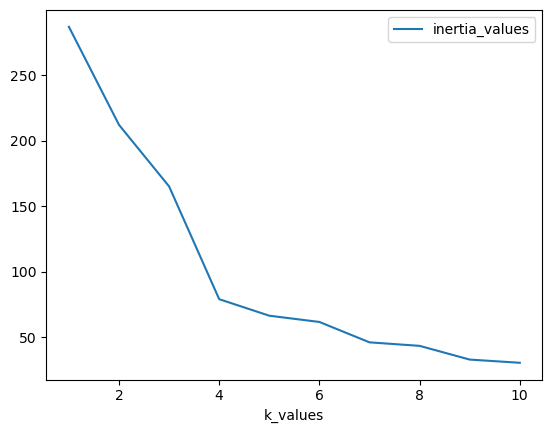

In [68]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df.set_index('k_values').plot()

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** The best value for k appears to be 4.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [69]:
# Initialize the K-Means model using the best value for k
optimal_model = KMeans(n_clusters=4,n_init='auto')

In [70]:
# Fit the K-Means model using the scaled data
optimal_model.fit(market_data_df_scaled)

c:\Conda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [71]:
# Predict the clusters to group the cryptocurrencies using the scaled data
optimal_predictions = optimal_model.predict(market_data_df_scaled)

# View the resulting array of cluster values.
optimal_predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 3, 0, 1, 1, 2, 1, 1, 1, 1])

In [72]:
# Create a copy of the DataFrame
market_data_df_scaled_predictions = market_data_df_scaled.copy()

In [73]:
# Add a new column to the DataFrame with the predicted clusters
market_data_df_scaled_predictions['crypto_cluster'] = optimal_predictions

# Display sample data
market_data_df_scaled_predictions.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,crypto_cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

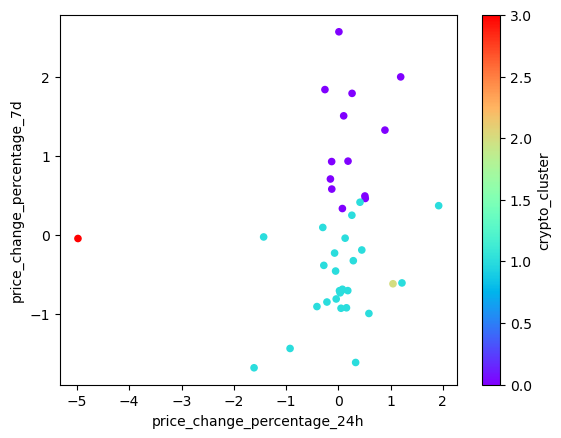

In [74]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
market_data_df_scaled_predictions.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c='crypto_cluster',
    colormap='rainbow'
)

### Optimize Clusters with Principal Component Analysis.

In [75]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)

In [76]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_df = pca_model.fit_transform(market_data_df_scaled)

# View the first five rows of the DataFrame. 
pca_df[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [77]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pca_model.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

In [78]:
pca_model.explained_variance_ratio_.sum()

0.895031657030984

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** Around 89.5% of the total explained variance is in the first 3 principal components

In [79]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you
# Creating a DataFrame with the PCA data

pca_scaled_df = pd.DataFrame(pca_df,columns=['PC1','PC2','PC3'])

# Copy the crypto names from the original data

pca_scaled_df = pca_scaled_df.set_index(market_data_df_scaled.index)

# Set the coinid column as index


# Display sample data
pca_scaled_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [81]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = range(1,11)

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for i in k:
# Inside the loop:
    model = KMeans(n_clusters=i,n_init='auto',random_state=1)
# 1. Create a KMeans model using the loop counter for the n_clusters
    model.fit(pca_scaled_df)
# 2. Fit the model to the data using PCA DataFrame.
    inertia.append(model.inertia_)
# 3. Append the model.inertia_ to the inertia list


# Create a dictionary with the data to plot the Elbow curve
elbow_dict = {'k_values':k,
              'inertia':inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_dict)

# Display the DataFrame
elbow_df

c:\Conda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Conda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Conda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Conda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are l

,k_values,inertia
0,1,256.874086
1,2,182.339530
2,3,135.442408
3,4,49.665497
4,5,38.672582
5,6,34.507577
6,7,23.728365
7,8,18.574523
8,9,15.572672
9,10,11.407667


<Axes: xlabel='k_values'>

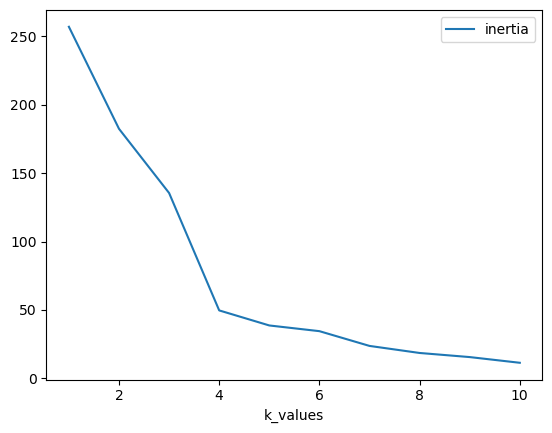

In [82]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df.set_index('k_values').plot()

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for k appears to be 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [83]:
# Initialize the K-Means model using the best value for k
optimal_pca_model = KMeans(n_clusters=4)

In [84]:
# Fit the K-Means model using the PCA data
optimal_pca_model.fit(pca_scaled_df)

c:\Conda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [86]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_predictions = optimal_pca_model.predict(pca_scaled_df)

# Print the resulting array of cluster values.
pca_predictions

array([0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0,
       3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 1, 0, 3, 3, 2, 3, 3, 3, 3])

In [87]:
# Create a copy of the DataFrame with the PCA data
pca_scaled_predictions_df = pca_scaled_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_scaled_predictions_df['crypto_cluster'] = pca_predictions

# Display sample data
pca_scaled_predictions_df.head()

,PC1,PC2,PC3,crypto_cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,3
ripple,-0.471835,-0.222660,-0.479053,3
bitcoin-cash,-1.157800,2.041209,1.859715,0


<Axes: xlabel='PC1', ylabel='PC2'>

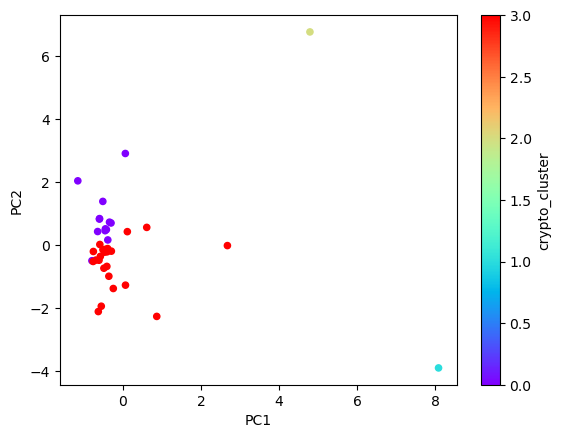

In [88]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
pca_scaled_predictions_df.plot.scatter(
    x='PC1',
    y='PC2',
    c='crypto_cluster',
    colormap='rainbow'
)

### Determine the Weights of Each Feature on each Principal Component

In [91]:
# Use the columns from the original scaled DataFrame as the index.
pca_component_weights = pd.DataFrame(pca_model.components_.T, columns=['PC1', 'PC2', 'PC3'], index=market_data_df_scaled.columns)
pca_component_weights

,PC1,PC2,PC3
price_change_percentage_24h,-0.416728,0.358162,-0.218795
price_change_percentage_7d,-0.102432,0.227432,0.787670
price_change_percentage_14d,-0.009162,0.540415,0.349534
price_change_percentage_30d,0.191523,0.562182,-0.181744
price_change_percentage_60d,0.320365,0.434040,-0.361377
price_change_percentage_200d,0.594468,0.027735,0.039733
price_change_percentage_1y,0.568379,-0.150789,0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** For PC1, the feature price_change_percentage_200d has the strongest positive influence, and price_change_percentage_24h has the strongest negative influence.  
For PC2, the feature price_change_30d has the strongest positive influence, and the feature price_change_1y has the strongest negative influence  
for PC3, the feature price_change_percentage_7d has by far the strongest positive influence, and price_change_percentage_60d has the strongest negative influence.
    